In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
xlsx_dir= '/Users/yuanfengji/Downloads/merged_output_GMAI_TEST (2).xlsx'
# xlsx_dir= '/Users/yuanfengji/Downloads/merged_output_OmniMedVQA.xlsx'
df = pd.read_excel(xlsx_dir)


In [24]:
print(df.columns)

Index(['index', 'question', 'answer', 'category', 'clinical VQA task',
       'department', 'perceptual granularity', 'modality', 'original task',
       'image_path', 'qwen', 'sft', 'sft_rl', 'rl', 'qwen2.5-7b_score',
       'sft_score', 'sft_rl_score', 'rl_score'],
      dtype='object')


/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_65732/4265818957.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = df.groupby('word_count_bin')[['sft_score', 'sft_rl_score', 'rl_score']].mean().reset_index()


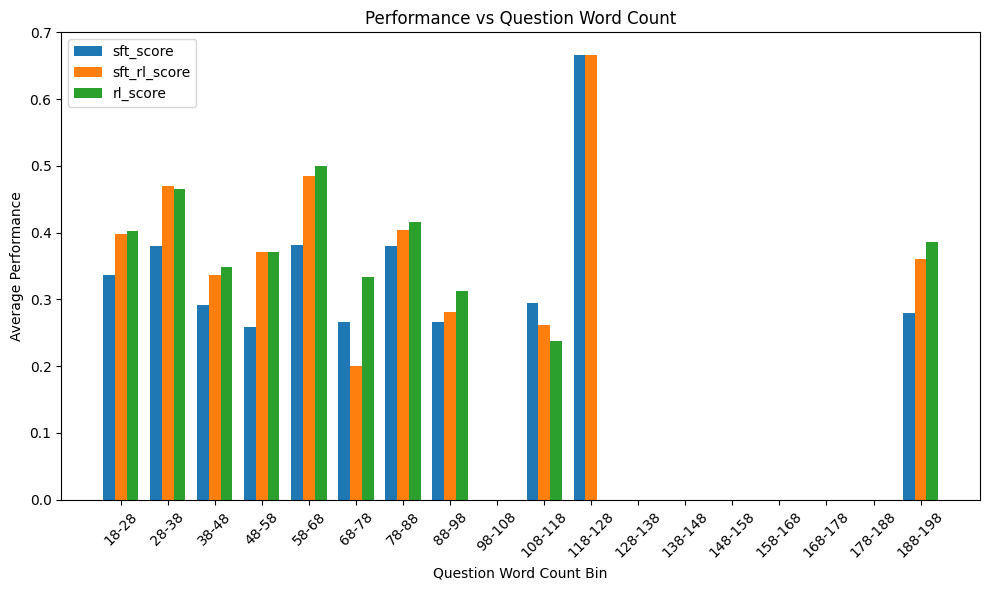

In [15]:
df['question_word_count'] = df['question'].str.split().apply(len)

# 2. 对单词数进行分箱，这里以5为一个区间（根据实际情况调整）
min_count = df['question_word_count'].min()
max_count = df['question_word_count'].max()
bins = np.arange(min_count, max_count + 10, 10)
df['word_count_bin'] = pd.cut(df['question_word_count'], bins=bins, right=False)

# 3. 按照分箱计算三个 score 的平均值
performance = df.groupby('word_count_bin')[['sft_score', 'sft_rl_score', 'rl_score']].mean().reset_index()

# 4. 绘制分组柱状图
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(performance))
width = 0.25  # 柱子的宽度

ax.bar(x - width, performance['sft_score'], width, label='sft_score')
ax.bar(x, performance['sft_rl_score'], width, label='sft_rl_score')
ax.bar(x + width, performance['rl_score'], width, label='rl_score')

# 设置 x 轴刻度及标签
ax.set_xticks(x)
ax.set_xticklabels([f"{interval.left}-{interval.right}" for interval in performance['word_count_bin']], rotation=45)
ax.set_xlabel('Question Word Count Bin')
ax.set_ylabel('Average Performance')
ax.set_title('Performance vs Question Word Count')
ax.legend()

plt.tight_layout()
plt.show()

/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_70425/547820608.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correct_counts = df.groupby('word_count_bin')[['qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score']].sum().reset_index()


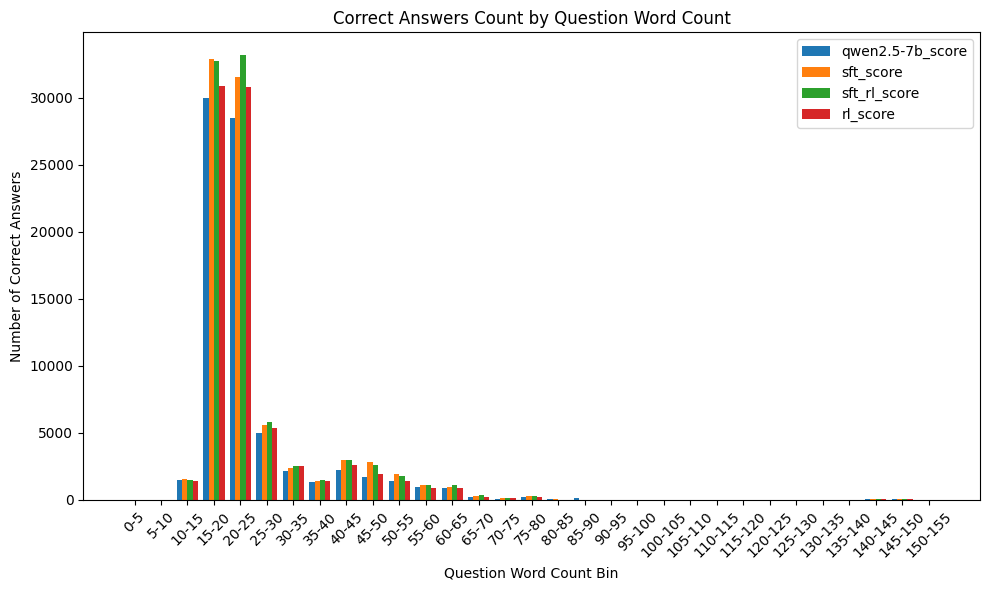

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你的 DataFrame 为 df，并包含 'question', 'qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score' 列

# 1. 计算每个问题的单词数
df['word_count'] = df['question'].str.split().apply(len)

# 2. 对单词数进行分箱，这里以 5 个单词为一组，可根据实际数据调整
max_count = df['word_count'].max()
bins = np.arange(0, max_count + 5, 5)
df['word_count_bin'] = pd.cut(df['word_count'], bins=bins, right=False)

# 3. 对每个分箱内，分别计算四个方法正确回答（1）的总数
correct_counts = df.groupby('word_count_bin')[['qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score']].sum().reset_index()

# 4. 绘制分组柱状图
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(correct_counts))
width = 0.2  # 每个柱子的宽度

# 计算各柱子在 x 轴上的偏移，使得四个柱子居中显示
ax.bar(x - 1.5*width, correct_counts['qwen2.5-7b_score'], width, label='qwen2.5-7b_score')
ax.bar(x - 0.5*width, correct_counts['sft_score'], width, label='sft_score')
ax.bar(x + 0.5*width, correct_counts['sft_rl_score'], width, label='sft_rl_score')
ax.bar(x + 1.5*width, correct_counts['rl_score'], width, label='rl_score')

# 设置 x 轴刻度和标签，标签显示分箱区间
ax.set_xticks(x)
ax.set_xticklabels([f"{int(interval.left)}-{int(interval.right)}" for interval in correct_counts['word_count_bin']], rotation=45)

ax.set_xlabel('Question Word Count Bin')
ax.set_ylabel('Number of Correct Answers')
ax.set_title('Correct Answers Count by Question Word Count')
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_70425/4241349002.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long_filtered['length_bin'] = pd.cut(df_long_filtered['answer_length'], bins=bins, right=False)
/var/folders/57/zwf2q7h16g36lm0q9mzqqqt80000gn/T/ipykernel_70425/4241349002.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_long_filtered.groupby(['method', 'length_bin'])['score'].mean().reset_index()


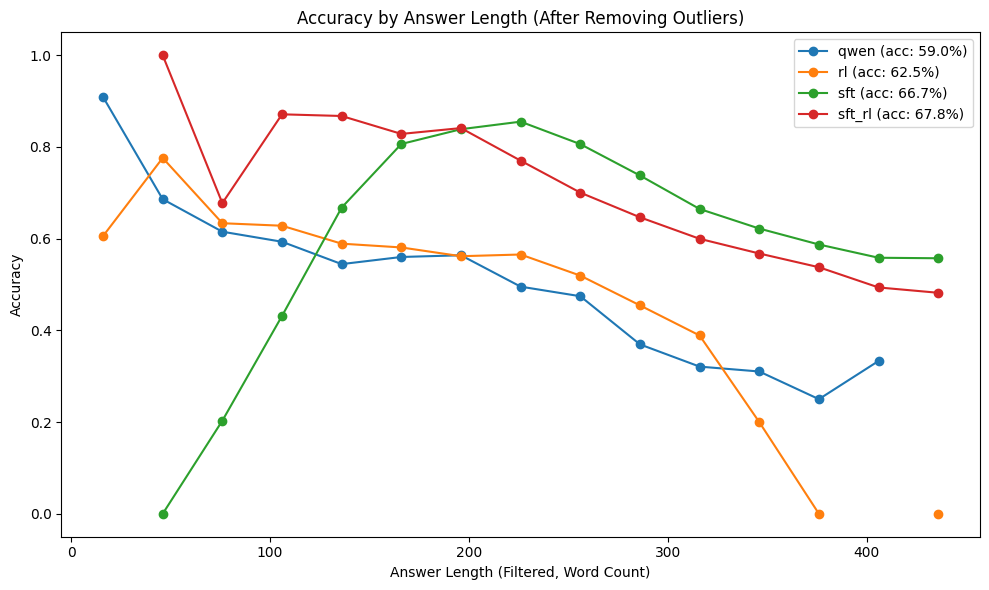

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你的 DataFrame 为 df，并包含:
# 回答文本列：'qwen', 'sft', 'sft_rl', 'rl'
# 正确性列：'qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score'

methods = [
    {'method': 'qwen',    'answer_col': 'qwen',    'score_col': 'qwen2.5-7b_score'},
    {'method': 'sft',     'answer_col': 'sft',     'score_col': 'sft_score'},
    {'method': 'sft_rl',  'answer_col': 'sft_rl',  'score_col': 'sft_rl_score'},
    {'method': 'rl',      'answer_col': 'rl',      'score_col': 'rl_score'}
]

# 1. 转成长格式，并计算回答长度
data_list = []
for m in methods:
    lengths = df[m['answer_col']].str.split().apply(len)
    scores  = df[m['score_col']]
    temp_df = pd.DataFrame({
        'method': m['method'],
        'answer_length': lengths,
        'score': scores
    })
    data_list.append(temp_df)
df_long = pd.concat(data_list, ignore_index=True)

# 2. 去除极端长度：以 99% 分位数为例
cutoff = df_long['answer_length'].quantile(0.99)
df_long_filtered = df_long[df_long['answer_length'] <= cutoff]

# 3. 对过滤后的数据分箱（例如每 50 词一个区间，或自行选择更精细/更宽的区间）
bin_width = 30
min_len = df_long_filtered['answer_length'].min()
max_len = df_long_filtered['answer_length'].max()
bins = np.arange(min_len, max_len + bin_width, bin_width)
df_long_filtered['length_bin'] = pd.cut(df_long_filtered['answer_length'], bins=bins, right=False)

# 4. 计算每个方法在各长度分箱的准确率（均值）
grouped = df_long_filtered.groupby(['method', 'length_bin'])['score'].mean().reset_index()

# 5. 计算各方法的总体准确率（过滤后）
overall_acc = df_long_filtered.groupby('method')['score'].mean()

# 6. 绘图：以长度分箱的中心作为 x 值，折线图表示准确率
fig, ax = plt.subplots(figsize=(10, 6))

for method in grouped['method'].unique():
    sub_df = grouped[grouped['method'] == method].copy()
    # 计算分箱中心
    sub_df['bin_center'] = sub_df['length_bin'].apply(lambda iv: iv.left + bin_width/2)
    
    ax.plot(
        sub_df['bin_center'], 
        sub_df['score'], 
        marker='o',
        label=f"{method} (acc: {overall_acc[method]*100:.1f}%)"
    )

ax.set_xlabel('Answer Length (Filtered, Word Count)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Answer Length (After Removing Outliers)')
ax.legend()
plt.tight_layout()
plt.show()


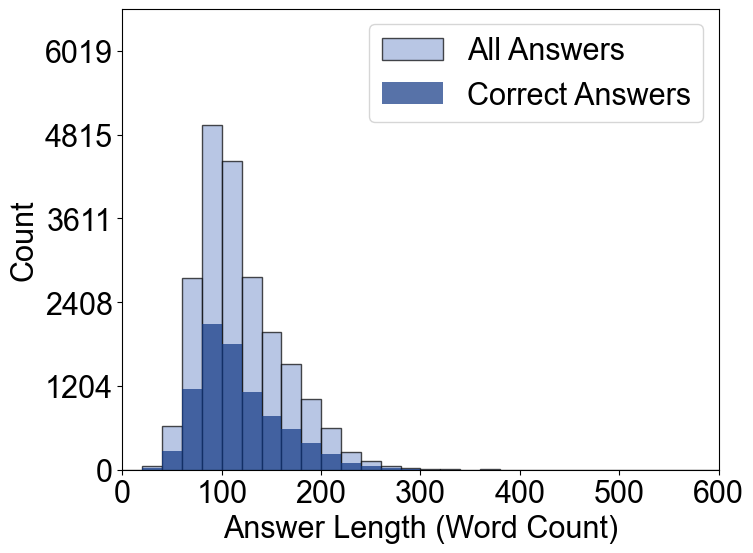

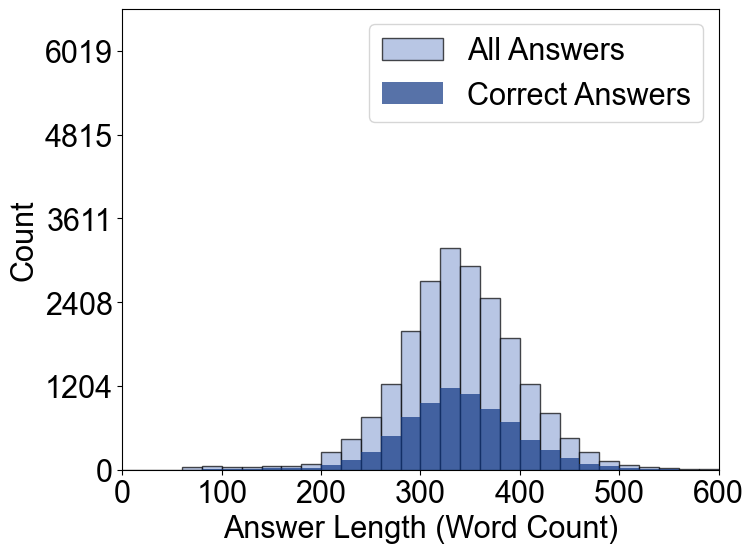

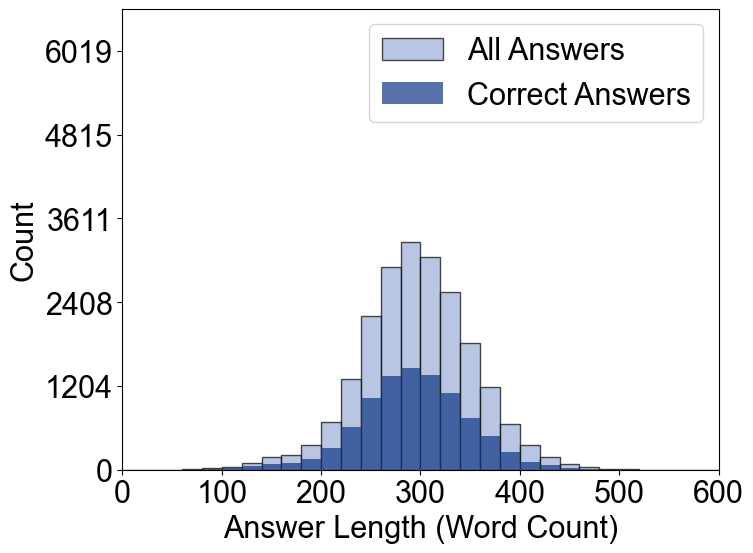

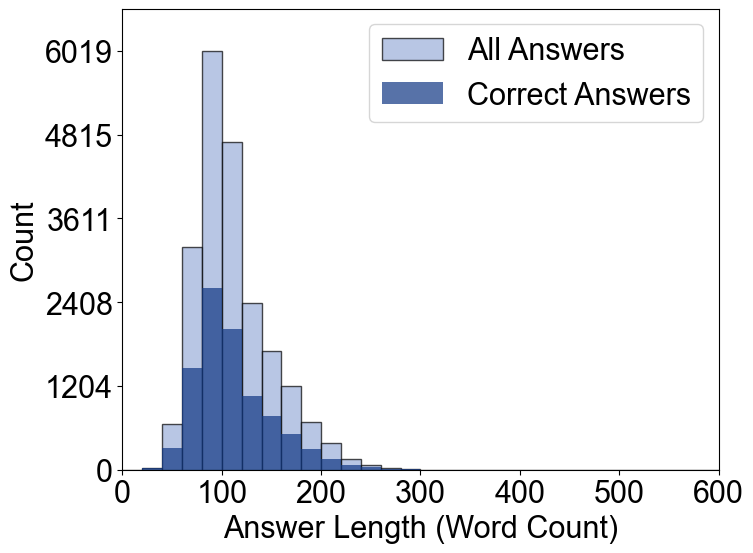

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 22})


save_dir = '/Users/yuanfengji/Downloads/gmai_vl_r1/gmai_bench_test/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# use axial font

# 假设 df 包含：
#   - 'qwen', 'sft', 'sft_rl', 'rl'               : 各方法的回答文本
#   - 'qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score' : 对应正确性(0/1)
# 请根据实际列名进行替换

methods = [
    {'method': 'qwen',    'answer_col': 'qwen',    'score_col': 'qwen2.5-7b_score'},
    {'method': 'sft',     'answer_col': 'sft',     'score_col': 'sft_score'},
    {'method': 'sft_rl',  'answer_col': 'sft_rl',  'score_col': 'sft_rl_score'},
    {'method': 'rl',      'answer_col': 'rl',      'score_col': 'rl_score'}
]

MAX_LENGTH = 600  # 限定回答长度最大为 600
NUM_BINS = 30     # 分箱数

# 第一步：遍历所有方法，计算所有回答直方图中最大的计数（用于统一 y 轴刻度）
global_max = 0
for m in methods:
    answer_col = m['answer_col']
    score_col  = m['score_col']
    
    df_method = df[[answer_col, score_col]].copy()
    df_method['answer_length'] = df_method[answer_col].str.split().apply(len)
    # 仅保留回答长度 <= MAX_LENGTH
    df_method = df_method[df_method['answer_length'] <= MAX_LENGTH]
    if df_method.empty:
        continue
    # 计算所有回答在各个区间的计数
    counts_all, _ = np.histogram(df_method['answer_length'], bins=NUM_BINS, range=(0, MAX_LENGTH))
    current_max = counts_all.max()
    if current_max > global_max:
        global_max = current_max

# 第二步：绘图，统一 x、y 轴刻度
for m in methods:
    method_name = m['method']
    answer_col  = m['answer_col']
    score_col   = m['score_col']
    
    # 1. 提取当前方法的数据，并计算回答长度（单词数）
    df_method = df[[answer_col, score_col]].copy()
    df_method['answer_length'] = df_method[answer_col].str.split().apply(len)
    df_method['score'] = df_method[score_col]
    df_method = df_method[df_method['answer_length'] <= MAX_LENGTH]
    
    if df_method.empty:
        print(f"{method_name} 方法中回答长度<=600的数据为空，跳过绘图。")
        continue
    
    overall_acc = df_method['score'].mean()  # 0~1
    
    # 2. 分别获取「所有回答」与「正确回答」的长度
    all_lengths = df_method['answer_length']
    correct_lengths = df_method.loc[df_method['score'] == 1, 'answer_length']
    
    # 3. 绘制叠加直方图（显示绝对计数）
    fig, ax = plt.subplots(figsize=(8, 6))
    # fig.suptitle(
    #     f"{method_name.upper()} - Answer Length Distribution (<= {MAX_LENGTH})\n"
    #     f"Overall Accuracy: {overall_acc * 100:.1f}%",
    #     fontsize=14
    # )
    
    # 绘制「所有回答」直方图（蓝色）
    ax.hist(
        all_lengths, 
        bins=NUM_BINS, 
        range=(0, MAX_LENGTH), 
        density=False, 
        color='#9bafd9', 
        edgecolor='black', 
        alpha=0.7, 
        label='All Answers'
    )
    
    # 绘制「正确回答」直方图（红色），作为子集
    ax.hist(
        correct_lengths, 
        bins=NUM_BINS, 
        range=(0, MAX_LENGTH), 
        density=False, 
        color='#103783', 
        alpha=0.7, 
        label='Correct Answers'
    )
    
    # 4. 统一 x、y 轴刻度
    ax.set_xlim(0, MAX_LENGTH)
    ax.set_xticks(np.arange(0, MAX_LENGTH+1, 100))  # 0, 100, 200, ... 600
    
    # 统一 y 轴：统一上限为 global_max 加上适当边距
    ax.set_ylim(0, global_max * 1.1)
    # 可自定义 y 轴刻度，如 0 到 global_max 之间分成 6 个刻度
    ax.set_yticks(np.linspace(0, global_max, 6))
    
    ax.set_xlabel("Answer Length (Word Count)")
    ax.set_ylabel("Count")
    ax.legend()
    
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(f"{save_dir}/{m['method']}_distribution.png", dpi=300, bbox_inches="tight")


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({'font.size': 20})

save_dir = '/Users/yuanfengji/Downloads/gmai_vl_r1/gmai_bench_test/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 假设 df 包含：
#   - 'question'                              : 问题文本
#   - 'qwen2.5-7b_score', 'sft_score', 'sft_rl_score', 'rl_score' : 对应正确性 (0/1)
# 请根据实际列名进行替换

methods = [
    {'method': 'qwen',    'score_col': 'qwen2.5-7b_score'},
    {'method': 'sft',     'score_col': 'sft_score'},
    {'method': 'sft_rl',  'score_col': 'sft_rl_score'},
    {'method': 'rl',      'score_col': 'rl_score'}
]

MAX_LENGTH = 100  # 限定问题长度最大为 600 个单词
NUM_BINS = 30     # 分箱数

# 第一步：遍历所有方法，计算所有问题直方图中最大的计数（用于统一 y 轴刻度）
global_max = 0
for m in methods:
    score_col = m['score_col']
    # 提取 question 和对应方法的 score 列
    df_method = df[['question', score_col]].copy()
    # 计算每个问题的单词数
    df_method['word_count'] = df_method['question'].str.split().apply(len)
    # 仅保留问题长度 <= MAX_LENGTH 的数据
    df_method = df_method[df_method['word_count'] <= MAX_LENGTH]
    if df_method.empty:
        continue
    # 计算所有问题在各个区间的计数
    counts_all, _ = np.histogram(df_method['word_count'], bins=NUM_BINS, range=(0, MAX_LENGTH))
    current_max = counts_all.max()
    if current_max > global_max:
        global_max = current_max

# 第二步：对每个方法单独绘图，统一 x、y 轴刻度，并保存图像
for m in methods:
    method_name = m['method']
    score_col   = m['score_col']
    
    # 提取当前方法的数据：使用 "question" 列和对应的 score 列
    df_method = df[['question', score_col]].copy()
    df_method['word_count'] = df_method['question'].str.split().apply(len)
    df_method['score'] = df_method[score_col]
    # 过滤问题长度 <= MAX_LENGTH
    df_method = df_method[df_method['word_count'] <= MAX_LENGTH]
    
    if df_method.empty:
        print(f"{method_name} 方法中问题长度<=600的数据为空，跳过绘图。")
        continue
    
    overall_acc = df_method['score'].mean()  # 整体准确率（0~1）
    
    # 分别获取「所有问题」与「正确回答问题」的 word_count
    all_counts = df_method['word_count']
    correct_counts = df_method.loc[df_method['score'] == 1, 'word_count']
    
    # 绘制叠加直方图（显示绝对计数）
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 绘制「所有问题」直方图（蓝色）
    ax.hist(
        all_counts, 
        bins=NUM_BINS, 
        range=(0, MAX_LENGTH), 
        density=False, 
        color='skyblue', 
        edgecolor='black', 
        alpha=0.7, 
        label='All Questions'
    )
    
    # 绘制「正确回答问题」直方图（红色），作为子集
    ax.hist(
        correct_counts, 
        bins=NUM_BINS, 
        range=(0, MAX_LENGTH), 
        density=False, 
        color='red', 
        alpha=0.4, 
        label='Correct Questions'
    )
    
    # 统一 x 轴刻度：0, 100, 200, ... ,600
    ax.set_xlim(0, MAX_LENGTH)
    ax.set_xticks(np.arange(0, MAX_LENGTH+1, 100))
    
    # 统一 y 轴：上限设为 global_max 加上 10% 的边距
    ax.set_ylim(0, global_max * 1.1)
    ax.set_yticks(np.linspace(0, global_max, 6))
    
    ax.set_xlabel("Question Word Count")
    ax.set_ylabel("Count")
    ax.legend()
    
    plt.tight_layout()
    # 保存图像，文件名为 method_question_distribution.png
    plt.savefig(f"{save_dir}/{method_name}_question_distribution.png", dpi=300, bbox_inches="tight")
    plt.close(fig)
